In [1]:
#!pip install basedosdados


In [2]:
import numpy as np
import basedosdados as bd
import matplotlib.pyplot as plt
import pandas as pd


In [43]:
query = """
SELECT *
FROM basedosdados.br_ibge_pam.lavoura_temporaria
WHERE sigla_uf = 'PE'
"""

df = bd.read_sql(query, billing_project_id='eda-pam')

Downloading: 100%|██████████| 299145/299145 [00:12<00:00, 24093.05rows/s]


In [44]:
df


,ano,sigla_uf,id_municipio,produto,area_plantada,area_colhida,quantidade_produzida,rendimento_medio_producao,valor_producao
0,2006,PE,2608909,Alho,<NA>,<NA>,NaN,NaN,NaN
1,2006,PE,2602605,Alho,<NA>,<NA>,NaN,NaN,NaN
2,2006,PE,2608008,Alho,<NA>,<NA>,NaN,NaN,NaN
3,2006,PE,2613701,Alho,<NA>,<NA>,NaN,NaN,NaN
4,2006,PE,2603900,Alho,<NA>,<NA>,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
299140,1988,PE,2616506,Girassol (em grão),<NA>,<NA>,NaN,NaN,NaN
299141,1988,PE,2616506,Ervilha (em grão),<NA>,<NA>,NaN,NaN,NaN
299142,1988,PE,2616506,Cebola,<NA>,<NA>,NaN,NaN,NaN
299143,1988,PE,2616506,Feijão (em grão),<NA>,<NA>,NaN,NaN,NaN


In [46]:
df.shape

(299145, 9)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299145 entries, 0 to 299144
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ano                        299145 non-null  Int64  
 1   sigla_uf                   299145 non-null  object 
 2   id_municipio               299145 non-null  object 
 3   produto                    299145 non-null  object 
 4   area_plantada              33469 non-null   Int64  
 5   area_colhida               49763 non-null   Int64  
 6   quantidade_produzida       49763 non-null   float64
 7   rendimento_medio_producao  49439 non-null   float64
 8   valor_producao             49770 non-null   float64
dtypes: Int64(3), float64(3), object(3)
memory usage: 21.4+ MB


In [48]:
df.isnull().sum()

,0
ano,0
sigla_uf,0
id_municipio,0
produto,0
area_plantada,265676
area_colhida,249382
quantidade_produzida,249382
rendimento_medio_producao,249706
valor_producao,249375


In [49]:
df.columns

Index(['ano', 'sigla_uf', 'id_municipio', 'produto', 'area_plantada',
       'area_colhida', 'quantidade_produzida', 'rendimento_medio_producao',
       'valor_producao'],
      dtype='object')

In [50]:
df.head(20)

,ano,sigla_uf,id_municipio,produto,area_plantada,area_colhida,quantidade_produzida,rendimento_medio_producao,valor_producao
0,2006,PE,2608909,Alho,<NA>,<NA>,NaN,NaN,NaN
1,2006,PE,2602605,Alho,<NA>,<NA>,NaN,NaN,NaN
2,2006,PE,2608008,Alho,<NA>,<NA>,NaN,NaN,NaN
3,2006,PE,2613701,Alho,<NA>,<NA>,NaN,NaN,NaN
4,2006,PE,2603900,Alho,<NA>,<NA>,NaN,NaN,NaN
5,2006,PE,2605905,Alho,<NA>,<NA>,NaN,NaN,NaN
6,2006,PE,2602001,Alho,<NA>,<NA>,NaN,NaN,NaN
7,2006,PE,2616308,Alho,<NA>,<NA>,NaN,NaN,NaN
8,2006,PE,2601052,Alho,<NA>,<NA>,NaN,NaN,NaN
9,2006,PE,2610004,Alho,<NA>,<NA>,NaN,NaN,NaN


In [51]:
df.describe()

,ano,area_plantada,area_colhida,quantidade_produzida,rendimento_medio_producao,valor_producao
count,299145.0,33469.0,49763.0,4.976300e+04,49439.000000,49770.000000
mean,1998.0,1076.516836,963.254587,1.903051e+04,9936.434404,837.631481
std,14.142159,2543.408728,2324.941682,9.685362e+04,14682.253699,5251.608477
min,1974.0,1.0,0.0,0.000000e+00,0.000000,0.000000
25%,1986.0,17.0,18.0,3.600000e+01,400.000000,0.000000
50%,1998.0,100.0,100.0,2.100000e+02,3040.000000,3.000000
75%,2010.0,800.0,700.0,1.300000e+03,12000.000000,117.000000
max,2022.0,32500.0,31000.0,1.860000e+06,380000.000000,273900.000000


In [52]:
df['produto'].nunique()

33

In [53]:
df['produto'].unique()

array(['Alho', 'Cebola', 'Melão', 'Tomate', 'Abacaxi*', 'Mandioca',
       'Melancia', 'Batata-doce', 'Juta (fibra)', 'Rami (fibra)',
       'Alfafa fenada', 'Malva (fibra)', 'Mamona (baga)',
       'Batata-inglesa', 'Fava (em grão)', 'Fumo (em folha)',
       'Linho (semente)', 'Soja (em grão)', 'Arroz (em casca)',
       'Aveia (em grão)', 'Cana-de-açúcar', 'Milho (em grão)',
       'Sorgo (em grão)', 'Trigo (em grão)', 'Cevada (em grão)',
       'Cana para forragem', 'Centeio (em grão)', 'Ervilha (em grão)',
       'Feijão (em grão)', 'Amendoim (em casca)', 'Girassol (em grão)',
       'Triticale (em grão)', 'Algodão herbáceo (em caroço)'],
      dtype=object)

In [54]:
import plotly.express as px
import kaleido

In [55]:
!pip install kaleido


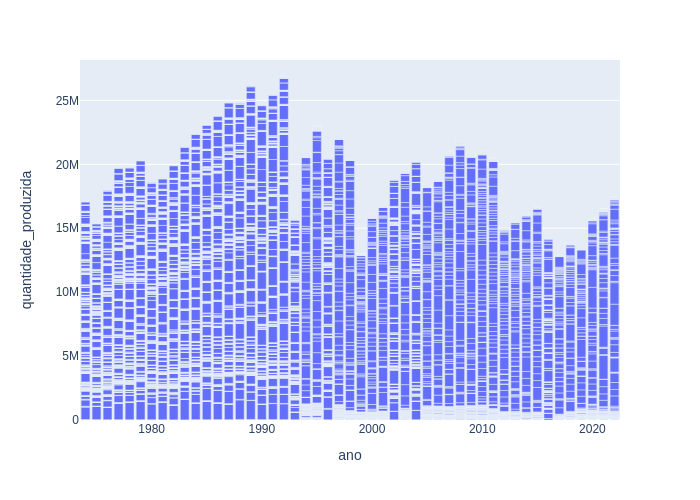

In [56]:
fig = px.bar(df, x='ano', y='quantidade_produzida')
fig.show('png')


In [57]:
df_filtro_ano = df[(df['ano'] >= 2012) & (df['ano'] <= 2022)]

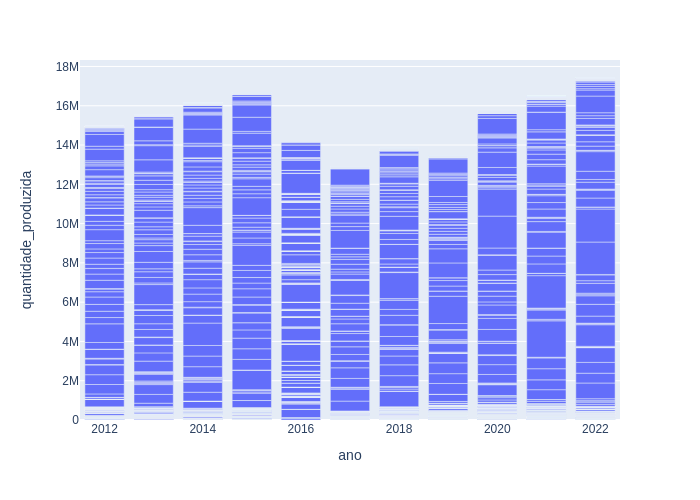

In [58]:
fig = px.bar(df_filtro_ano, x='ano', y='quantidade_produzida')
fig.show('png')

In [59]:
df_top10_produtos = df.groupby('produto')['quantidade_produzida'].sum().sort_values(ascending=False).head(10).reset_index()
df_top10_produtos


,produto,quantidade_produzida
0,Cana-de-açúcar,8.724643e+08
1,Mandioca,4.307188e+07
2,Tomate,8.198878e+06
3,Milho (em grão),6.235673e+06
4,Feijão (em grão),4.083194e+06
5,Melancia,3.649337e+06
6,Cebola,3.226476e+06
7,Batata-doce,1.826819e+06
8,Abacaxi*,1.121172e+06
9,Melão,9.095022e+05


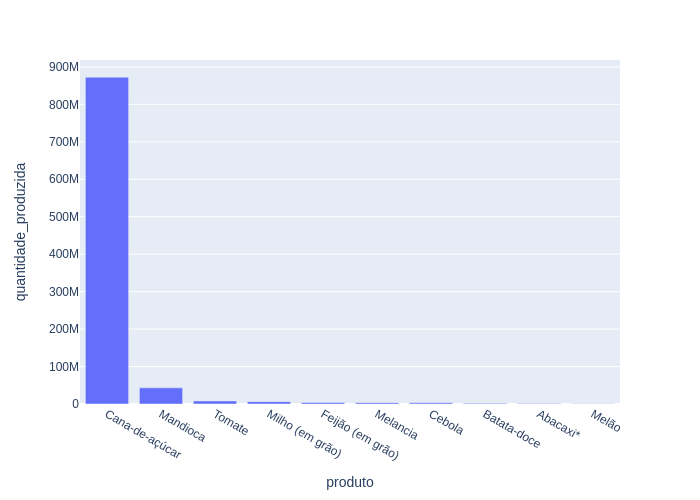

In [60]:
fig = px.bar(df_top10_produtos, x='produto', y='quantidade_produzida')
fig.show('png')

In [61]:
df_top5_produtos = df.groupby('produto')['quantidade_produzida'].sum().sort_values(ascending=False).head().reset_index()
df_top5_produtos

,produto,quantidade_produzida
0,Cana-de-açúcar,872464320.0
1,Mandioca,43071879.0
2,Tomate,8198878.0
3,Milho (em grão),6235673.0
4,Feijão (em grão),4083194.0


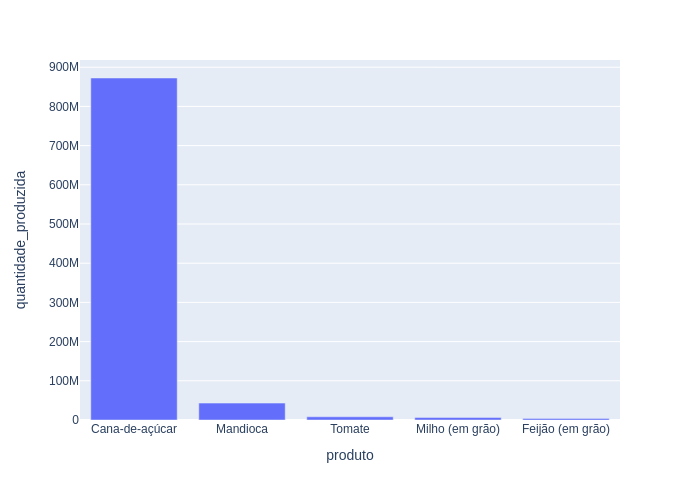

In [62]:
fig = px.bar(df_top5_produtos, x='produto', y='quantidade_produzida')
fig.show('png')

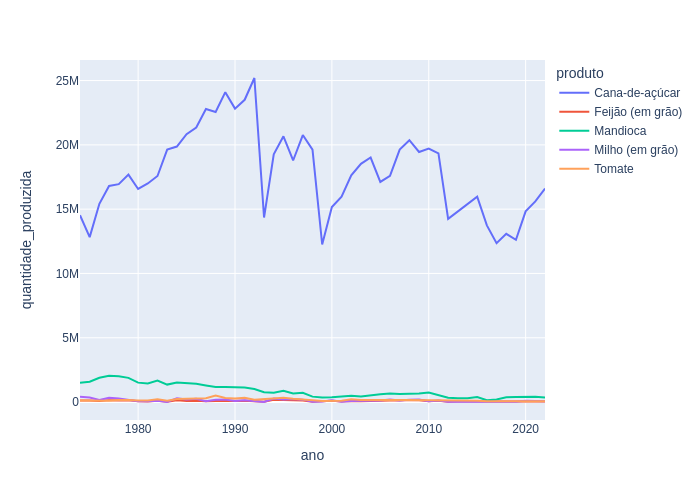

In [63]:
df_top5_produtos_por_ano = df[df['produto'].isin(df_top5_produtos['produto'])].groupby(['produto', 'ano'])['quantidade_produzida'].sum().reset_index()
fig = px.line(df_top5_produtos_por_ano, x='ano', y='quantidade_produzida', color='produto')
fig.show('png')


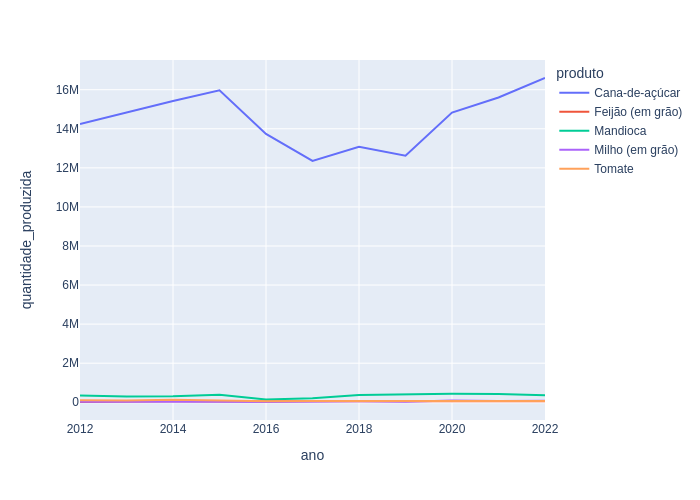

In [64]:
df_top5_produtos_por_ano_filtrado = df_top5_produtos_por_ano[(df_top5_produtos_por_ano['ano'] >= 2012) & (df_top5_produtos_por_ano['ano'] <= 2022)]
fig = px.line(df_top5_produtos_por_ano_filtrado, x='ano', y='quantidade_produzida', color='produto')
fig.show('png')


In [65]:
df.corr()

,ano,area_plantada,area_colhida,quantidade_produzida,rendimento_medio_producao,valor_producao
ano,1.000000,-0.040535,-0.044608,0.015340,0.094782,0.188264
area_plantada,-0.040535,1.000000,0.959014,0.737979,0.250673,0.485925
area_colhida,-0.044608,0.959014,1.000000,0.759603,0.278175,0.424714
quantidade_produzida,0.015340,0.737979,0.759603,1.000000,0.519136,0.558949
rendimento_medio_producao,0.094782,0.250673,0.278175,0.519136,1.000000,0.340785
valor_producao,0.188264,0.485925,0.424714,0.558949,0.340785,1.000000


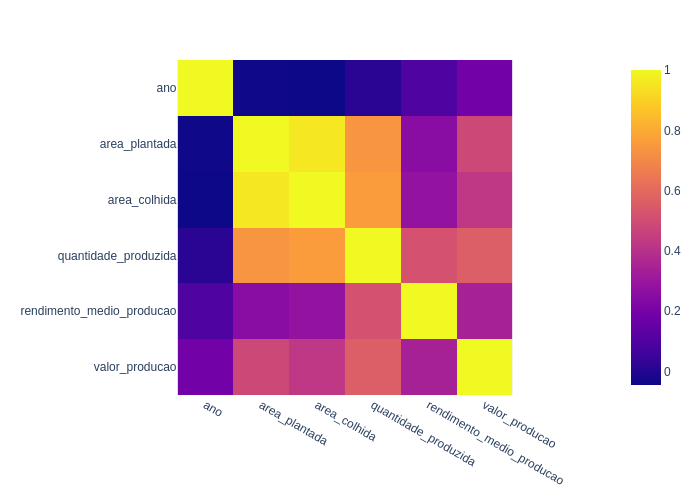

In [66]:
fig = px.imshow(df.corr())
fig.show('png')

In [ ]:
fig = px.scatter_matrix(df, dimensions=['ano', 'produto', 'area_plantada', 'area_colhida', 'quantidade_produzida', 'rendimento_medio_producao', 'valor_producao'])
fig.show('png')


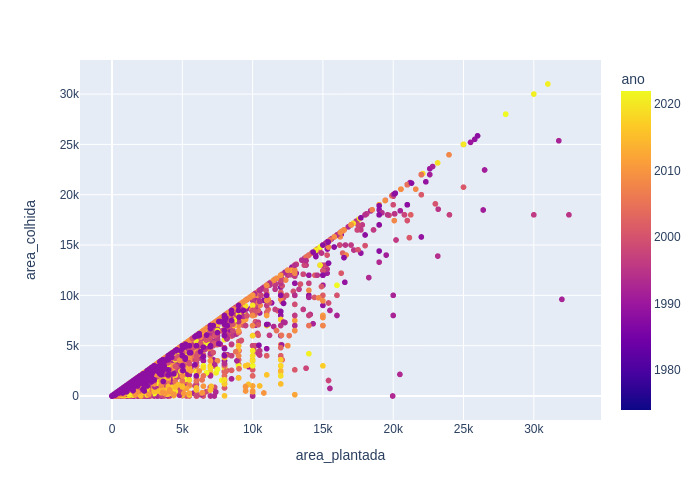

In [88]:
fig = px.scatter(df, x='area_plantada', y="area_colhida", color='ano')
fig.show('png')

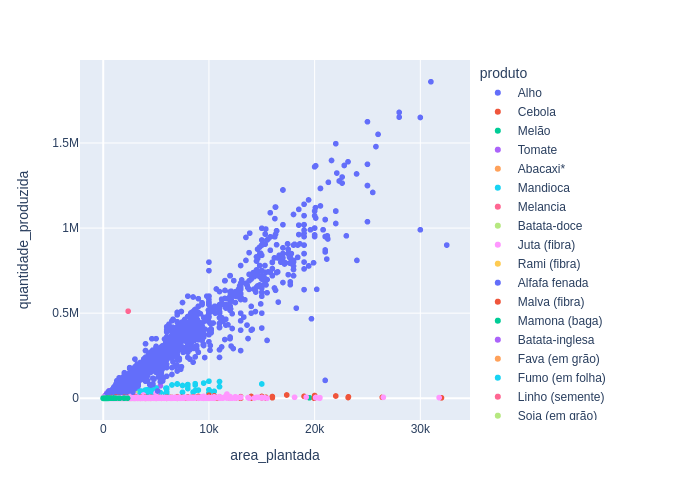

In [89]:
fig = px.scatter(df, x='area_plantada', y="quantidade_produzida", color='produto')
fig.show('png')

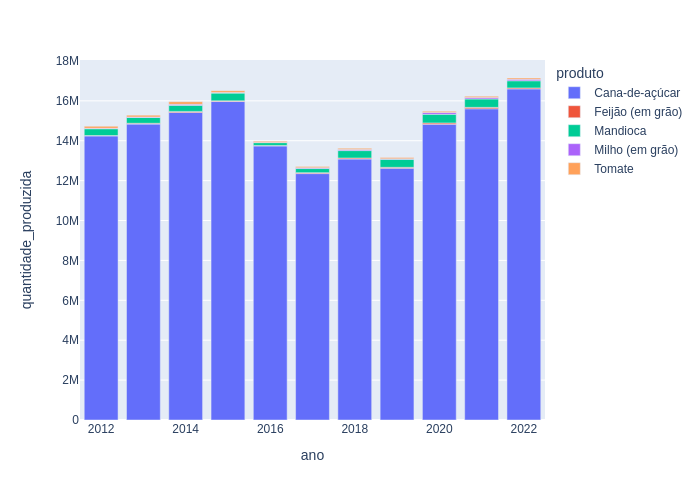

In [73]:
fig = px.bar(df_top5_produtos_por_ano_filtrado, x='ano', y='quantidade_produzida', color='produto')
fig.show('png')


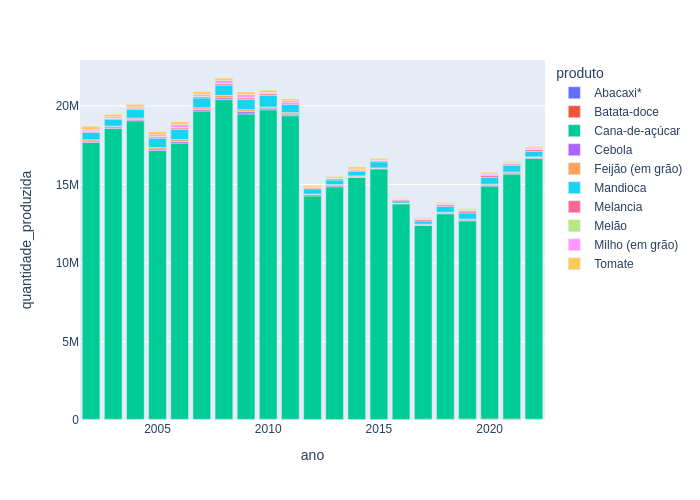

In [72]:
df_top10_produtos_por_ano = df[df['produto'].isin(df_top10_produtos['produto'])].groupby(['produto', 'ano'])['quantidade_produzida'].sum().reset_index()
df_top10_produtos_por_ano_filtrado = df_top10_produtos_por_ano[(df_top10_produtos_por_ano['ano'] >= 2002) & (df_top10_produtos_por_ano['ano'] <= 2022)]

fig = px.bar(df_top10_produtos_por_ano_filtrado, x='ano', y='quantidade_produzida', color='produto')
fig.show('png')


In [75]:
df_area_por_ano = df[df['ano'] > 1987].groupby('ano')[['area_destinada_colheita', 'area_colhida']].sum().reset_index()
df_area_por_ano


KeyError: "Columns not found: 'area_destinada_colheita'"

In [70]:
percent_area_colhida = (df_area_por_ano['area_colhida'] / df_area_por_ano['area_destinada_colheita']) * 100
percent_area_colhida

,0
0,95.475173
1,78.125532
2,94.352244
3,96.256513
4,96.505655
5,92.131688
6,94.527547
7,98.438379
8,92.047808
9,90.057029


In [76]:
df_area_por_ano['percent_area_colhida'] = percent_area_colhida
df_area_por_ano


,ano,area_destinada_colheita,area_colhida,percent_area_colhida
0,1988,135298,129176,95.475173
1,1989,135089,105539,78.125532
2,1990,117799,111146,94.352244
3,1991,106318,102338,96.256513
4,1992,102394,98816,96.505655
5,1993,87935,81016,92.131688
6,1994,81024,76590,94.527547
7,1995,79981,78732,98.438379
8,1996,86429,79556,92.047808
9,1997,93111,83853,90.057029


In [77]:
df_area_por_ano.sort_values('percent_area_colhida', ascending=True)


,ano,area_destinada_colheita,area_colhida,percent_area_colhida
1,1989,135089,105539,78.125532
11,1999,89186,71698,80.391541
10,1998,88180,75600,85.733726
9,1997,93111,83853,90.057029
8,1996,86429,79556,92.047808
5,1993,87935,81016,92.131688
20,2008,100108,93415,93.314221
2,1990,117799,111146,94.352244
28,2016,76191,71933,94.411413
13,2001,78394,74024,94.425594


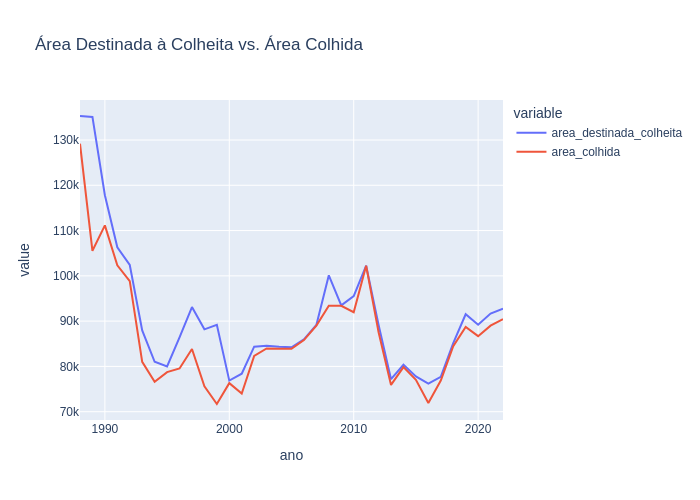

In [78]:
fig = px.line(df_area_por_ano, x='ano', y=['area_destinada_colheita', 'area_colhida'],
              title='Área Destinada à Colheita vs. Área Colhida')
fig.show('png')



In [79]:
rendimento_medio_por_ano = df.groupby('ano')['rendimento_medio_producao'].mean().reset_index()
rendimento_medio_por_ano

,ano,rendimento_medio_producao
0,1974,8347.595736
1,1975,8373.095517
2,1976,8494.924963
3,1977,8465.367396
4,1978,8610.733039
5,1979,8776.643007
6,1980,7968.480995
7,1981,7544.671195
8,1982,8079.980823
9,1983,8032.813848


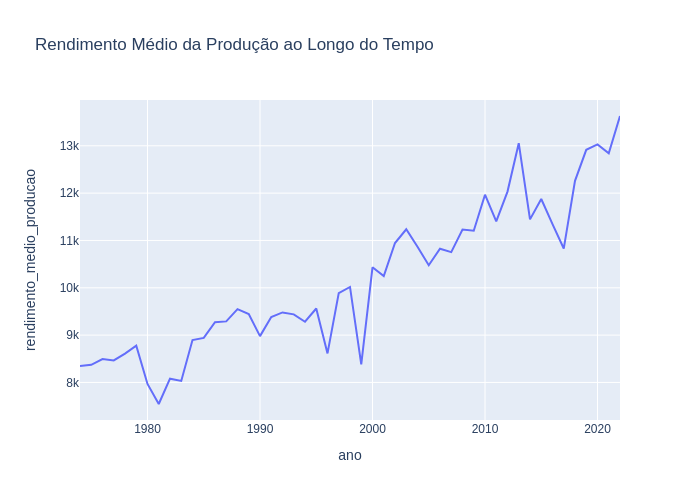

In [80]:
fig = px.line(rendimento_medio_por_ano, x='ano', y='rendimento_medio_producao',
              title='Rendimento Médio da Produção ao Longo do Tempo')
fig.show('png')

In [81]:
df_produtividade = df.groupby(['produto', 'ano'])['quantidade_produzida', 'area_colhida'].sum().reset_index()
df_produtividade['produtividade_media'] = (df_produtividade['quantidade_produzida'] / df_produtividade['area_colhida'])
df_produtividade


,produto,ano,quantidade_produzida,area_colhida,produtividade_media
0,Abacaxi*,1974,36399.0,2873,12.669335
1,Abacaxi*,1975,25586.0,2658,9.626035
2,Abacaxi*,1976,26856.0,2790,9.625806
3,Abacaxi*,1977,27707.0,2382,11.631822
4,Abacaxi*,1978,23675.0,1934,12.241468
...,...,...,...,...,...
1612,Triticale (em grão),2018,0.0,0,NaN
1613,Triticale (em grão),2019,0.0,0,NaN
1614,Triticale (em grão),2020,0.0,0,NaN
1615,Triticale (em grão),2021,0.0,0,NaN


In [82]:
df_valor_producao = df.groupby(['produto', 'ano'])['valor_producao', 'quantidade_produzida'].sum().reset_index()


In [83]:
df_valor_producao.sort_values('valor_producao', ascending=False).head(20)

,produto,ano,valor_producao,quantidade_produzida
538,Cana-de-açúcar,2022,2684054.0,16599141.0
537,Cana-de-açúcar,2021,2318844.0,15602250.0
536,Cana-de-açúcar,2020,1657084.0,14826596.0
527,Cana-de-açúcar,2011,1339335.0,19332281.0
532,Cana-de-açúcar,2016,1334890.0,13738711.0
526,Cana-de-açúcar,2010,1261246.0,19704071.0
531,Cana-de-açúcar,2015,1199041.0,15965218.0
535,Cana-de-açúcar,2019,1140727.0,12618828.0
534,Cana-de-açúcar,2018,1116594.0,13083448.0
533,Cana-de-açúcar,2017,1080599.0,12352698.0


In [84]:
rendimento_medio_por_produto = df.groupby(['produto', 'ano'])['rendimento_medio_producao'].mean().reset_index()
rendimento_medio_por_produto

,produto,ano,rendimento_medio_producao
0,Abacaxi*,1974,8982.794872
1,Abacaxi*,1975,7889.317073
2,Abacaxi*,1976,7868.000000
3,Abacaxi*,1977,8261.027778
4,Abacaxi*,1978,8541.828571
...,...,...,...
1612,Triticale (em grão),2018,NaN
1613,Triticale (em grão),2019,NaN
1614,Triticale (em grão),2020,NaN
1615,Triticale (em grão),2021,NaN


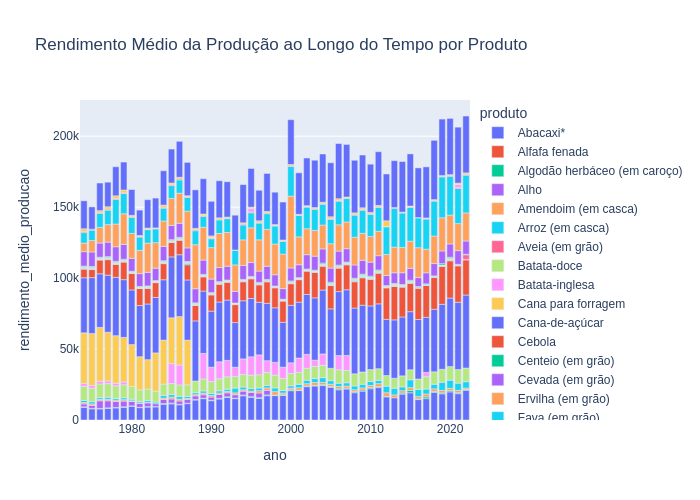

In [85]:
fig = px.bar(rendimento_medio_por_produto, x='ano', y='rendimento_medio_producao', color='produto',
              title='Rendimento Médio da Produção ao Longo do Tempo por Produto')
fig.show('png')